In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [7]:
df = pd.read_csv("../scraper/arxiv_small.csv")

In [13]:
target_categories = ["hep-th", "hep-ph", "gr-qc"]
X = df['abstract']
y = df['primary_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [14]:
vectorizer = TfidfVectorizer(
    max_features=10000,  
    ngram_range=(1, 2), 
    stop_words='english'
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
clf = LogisticRegression(
    max_iter=1000,
    class_weight='balanced', 
    random_state=21
)
clf.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=21)

In [16]:
y_pred = clf.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       gr-qc       1.00      0.67      0.80         3
      hep-ph       0.73      1.00      0.84         8
      hep-th       1.00      0.33      0.50         3

    accuracy                           0.79        14
   macro avg       0.91      0.67      0.71        14
weighted avg       0.84      0.79      0.76        14



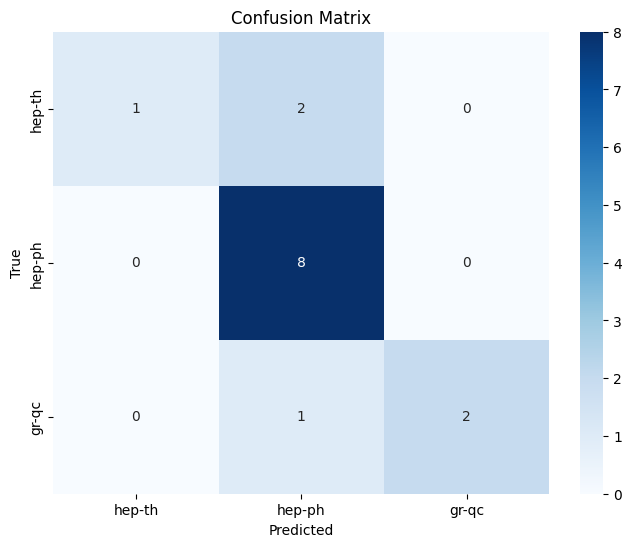

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=target_categories)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_categories, yticklabels=target_categories, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def show_top_features_per_class(vectorizer, clf, categories, top_n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        coef = clf.coef_[i]
        top_positive_idx = np.argsort(coef)[-top_n:]
        top_negative_idx = np.argsort(coef)[:top_n]

        print(f"\nCategory: {category}")
        print(f"Top {top_n} positive features:")
        print(feature_names[top_positive_idx][::-1])

        print(f"Top {top_n} negative features:")
        print(feature_names[top_negative_idx])

In [20]:
show_top_features_per_class(vectorizer, clf, target_categories, top_n=15)


Category: hep-th
Top 15 positive features:
['ac' 'black' 'phi' 'star' 'black hole' 'hole' 'thermodynamic' 'bh' 'cs'
 'mode' 'beta_5' 'excitation' 'constant' 'shadow' 'curvature']
Top 15 negative features:
['axion' 'fb' 'production' 'dark' 'symmetry' 'gamma' 'limits'
 'dark matter' 'cross section' 'section' 'cross' 'neutron' 'tau' 'spin'
 'mass']

Category: hep-ph
Top 15 positive features:
['axion' 'fb' 'limits' 'dm' 'production' 'neutron' 'search'
 'observed expected' 'section' 'cross section' 'cross' 'expected'
 'optical' 'eo' 'laser']
Top 15 negative features:
['black' 'black hole' 'hole' 'modes' 'symmetry' 'ac' 'theory' 'string'
 'corrections' 'phi' 'effects' 'investigate' 'gauge' 'star' 'massless']

Category: gr-qc
Top 15 positive features:
['dark' 'quark' 'masses' 'scale' 'bar' 'flavour' 'corrections' 'higgs'
 'neutrino' 'decays' 'leading' 'dark matter' 'breaking' 'soft' 'heavy']
Top 15 negative features:
['limits' 'fb' 'axion' 'black' 'method' 'dm' 'search' 'ac' 'black hole'
 'h

In [22]:
def plot_wordcloud_for_class(vectorizer, clf, category_index, category_name, max_words=100):
    feature_names = np.array(vectorizer.get_feature_names_out())
    coef = clf.coef_[category_index]

    word_weights = {feature_names[i]: coef[i] for i in range(len(coef)) if coef[i] > 0}

    wc = WordCloud(width=800, height=400, background_color='white', max_words=max_words)
    wc.generate_from_frequencies(word_weights)

    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for category: {category_name}", fontsize=16)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


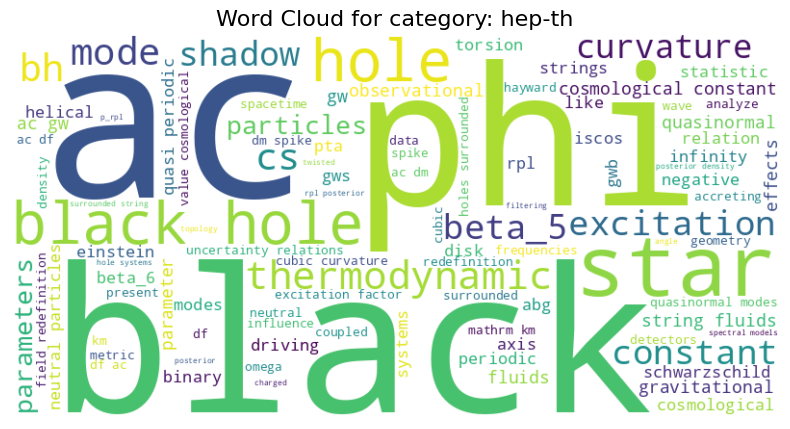

In [23]:
plot_wordcloud_for_class(vectorizer, clf, 0, target_categories[0])

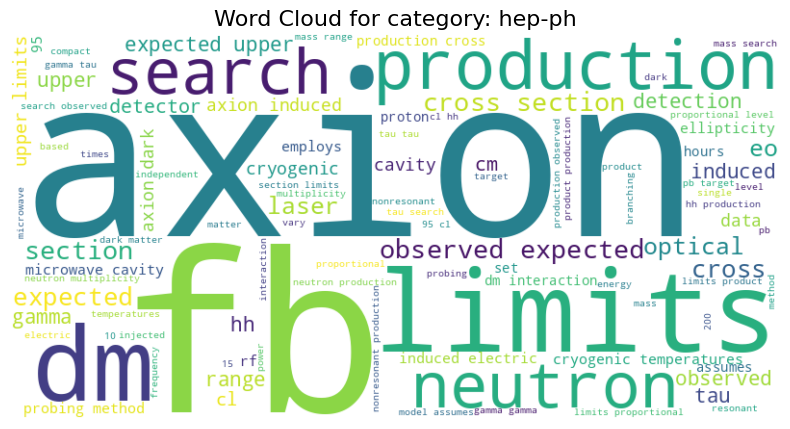

In [24]:
plot_wordcloud_for_class(vectorizer, clf, 1, target_categories[1])

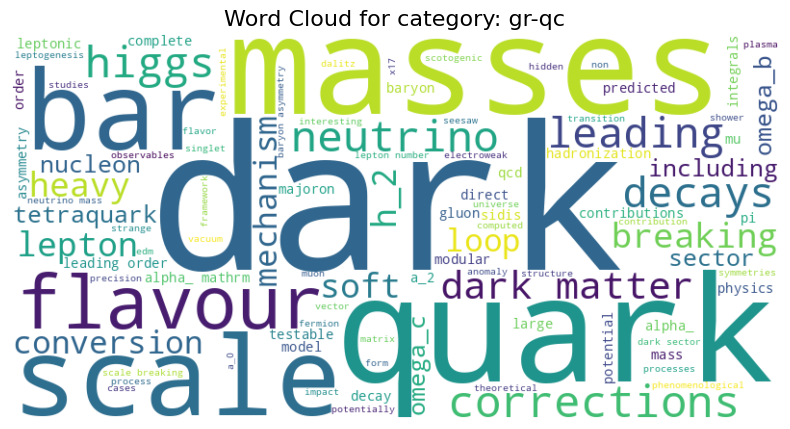

In [25]:
plot_wordcloud_for_class(vectorizer, clf, 2, target_categories[2])